In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

In [ ]:
!pip install konlpy
!pip install gensim

In [57]:
import konlpy
import gensim
import sklearn
import seaborn

In [3]:
import os

data_dir = os.path.join(os.getenv("HOME"), "/content")
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [ ]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt

okt = Okt()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

print("슝~")

In [68]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['행복'])

[('기쁨', 0.919510006904602),
 ('진정', 0.8731049299240112),
 ('슬픔', 0.8684926629066467),
 ('용기', 0.8611566424369812),
 ('좌절', 0.859274685382843),
 ('화해', 0.8530511260032654),
 ('아주', 0.8488425612449646),
 ('아픔', 0.8425647616386414),
 ('눈물', 0.8410203456878662),
 ('위로', 0.8406178951263428)]

W2V 이 잘 되었다

In [61]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

In [60]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [62]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [63]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])

23976
영화


In [64]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 영화제, 사이, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 아빠, 생활, 통해, 모습, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 결혼, 사고, 전쟁, 위기, 때문, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 운명, 결심, 관계, 현실, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 처음, 국제, 누구, 살인, 충격, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 의도, 동생, 하루, 위기, 계획, 정체, 한국, 

In [69]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [70]:
print(target_art)
print(target_gen)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [71]:
print(len(tokenized))

71156


In [20]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

명사 읽어오기

In [23]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [51]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


중복을 해결하기 위한 여러가지 아이디어  
1. LSA 진행
2. 얻은 단어들중 중복을 제거
3. 워드 임데잉으로 얻은 코사인 유사도가 임계값을 넘으면 삭제

In [80]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 프롤, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 사람, 운명, 최고, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 태구, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시

In [81]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [ ]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

weat score

In [38]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [41]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

In [46]:
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

In [31]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

<Axes: >

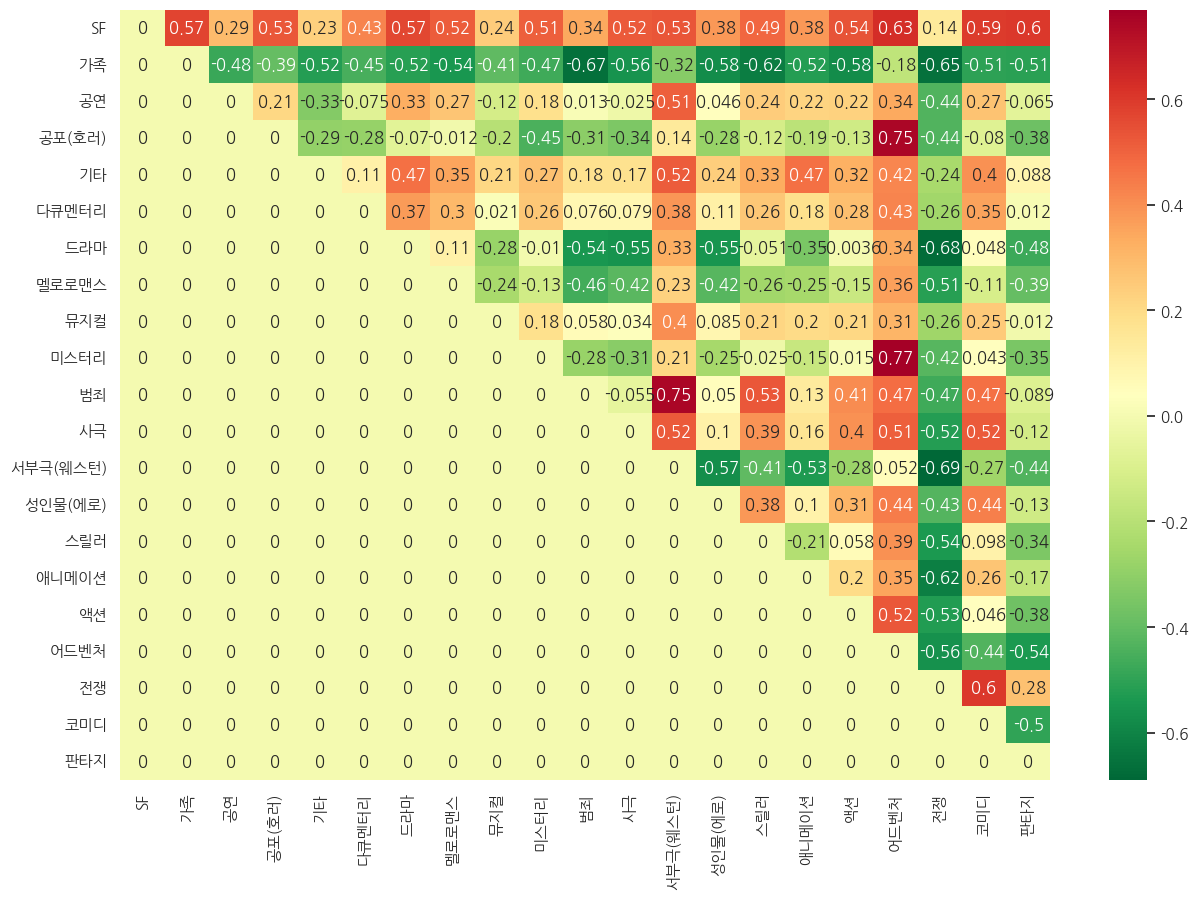

In [55]:
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt

np.random.seed(0)

sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

# 보기 좋게 만들기
plt.figure(figsize=(15, 10))

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

중복 삭제

In [84]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

attributes_tfidf_strictly_unique = [] # New variable for strictly unique attributes
desired_attr_count = 15
# Keep track of words already added to any genre's attribute list
added_words = set()

for i in range(len(w)):
    print(genre_name[i], end=': ')
    current_attr = []
    j = 0
    # Iterate through the words of the current genre sorted by TF-IDF
    while (len(current_attr) < desired_attr_count) and (j < len(w[i])):
        word = vectorizer.get_feature_names_out()[w[i][j][0]]

        # Only add the word if it's in the Word2Vec model AND has not been added to any previous genre's list
        if word in model.wv and word not in added_words:
            current_attr.append(word)
            added_words.add(word) # Add the word to the set of added words
            print(word, end=', ')

        j += 1

    attributes_tfidf_strictly_unique.append(current_attr)
    # Print the selected attributes for verification
    print(", ".join(current_attr))
    print()

# Note: This method guarantees uniqueness across all attribute sets, but a genre might end up
# with fewer than desired_attr_count words if there aren't enough unique words in its top list
# that haven't been taken by previous genres.

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선

가족: 엄마, 아빠, 가족, 영화제, 친구, 아주르, 아버지, 아들, 국제, 마을, 낙타, 할머니, 씨제이, 동구, 아이, 엄마, 아빠, 가족, 영화제, 친구, 아주르, 아버지, 아들, 국제, 마을, 낙타, 할머니, 씨제이, 동구, 아이

공연: 오페라, 사랑, 토스카, 실황, 올레, 카바, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 비바, 카르피, 왕자, 오페라, 사랑, 토스카, 실황, 올레, 카바, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 비바, 카르피, 왕자

공포(호러): 사건, 공포, 발견, 죽음, 악령, 남자, 좀비, 영화, 사실, 소녀, 하나, 살인, 비밀, 이야기, 정체, 사건, 공포, 발견, 죽음, 악령, 남자, 좀비, 영화, 사실, 소녀, 하나, 살인, 비밀, 이야기, 정체

기타: 서울, 단편, 뉴미디어, 페스티벌, 여자, 대한, 독립, 작품, 통해, 아시아나, 다른, 우리, 연출, 모습, 시간, 서울, 단편, 뉴미디어, 페스티벌, 여자, 대한, 독립, 작품, 통해, 아시아나, 다른, 우리, 연출, 모습, 시간

다큐멘터리: 다큐, 다큐멘터리, 감독, 여성, 한국, 환경, 사회, 노동자, 세상, 가장, 기록, 역사, 음악, 미국, 명의, 다큐, 다큐멘터리, 감독, 여성, 한국, 환경, 사회, 노동자, 세상, 가장, 기록, 역사, 음악, 미국, 명의

드라마: 마음, 남편, 서로, 다시, 관계, 생각, 아내, 사이, 소년, 때문, 부문, 어머니, 학교, 생활, 결혼, 마음, 남편, 서로, 다시, 관계, 생각, 아내, 사이, 소년, 때문, 부문, 어머니, 학교, 생활, 결혼

멜로로맨스: 섹스, 부부, 점점, 회사, 유혹, 연애, 애인, 새엄마, 불륜, 남자친구, 유부녀, 감정, 정사, 출장, 선배, 섹스,

WEAT score 재구현..?

In [85]:
def weat_score(X, Y, A, B):
    X = np.array(X)
    Y = np.array(Y)
    A = np.array(A)
    B = np.array(B)

    if A.shape[0] == 0 or B.shape[0] == 0:

        return 0

    X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0) if np.std(X, axis=0).all() != 0 else X - np.mean(X, axis=0)
    Y_norm = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0) if np.std(Y, axis=0).all() != 0 else Y - np.mean(Y, axis=0)
    A_norm = (A - np.mean(A, axis=0)) / np.std(A, axis=0) if np.std(A, axis=0).all() != 0 else A - np.mean(A, axis=0)
    B_norm = (B - np.mean(B, axis=0)) / np.std(B, axis=0) if np.std(B, axis=0).all() != 0 else B - np.mean(B, axis=0)


    s_XA = np.sum(X_norm.dot(A_norm.T), axis=1)
    s_XB = np.sum(X_norm.dot(B_norm.T), axis=1)
    s_YA = np.sum(Y_norm.dot(A_norm.T), axis=1)
    s_YB = np.sum(Y_norm.dot(B_norm.T), axis=1)

    avg_s_X = np.mean(s_XA) - np.mean(s_XB)
    avg_s_Y = np.mean(s_YA) - np.mean(s_YB)


    all_s_values = np.concatenate([s_XA, s_XB, s_YA, s_YB])
    std_dev = np.std(all_s_values)

    if std_dev == 0:
        return 0

    return  (avg_s_X-avg_s_Y)/std_dev

matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]


X_target_vectors = np.array([model.wv[word] for word in target_art if word in model.wv])
Y_target_vectors = np.array([model.wv[word] for word in target_gen if word in model.wv])

if X_target_vectors.shape[0] == 0 or Y_target_vectors.shape[0] == 0:
    print("Warning: Target word vectors are empty. Cannot calculate WEAT scores.")
else:
    for i in range(len(genre_name)-1):
        for j in range(i+1, len(genre_name)):
            A_attr_vectors = np.array([model.wv[word] for word in attributes_tfidf_strictly_unique[i] if word in model.wv])
            B_attr_vectors = np.array([model.wv[word] for word in attributes_tfidf_strictly_unique[j] if word in model.wv])

            if A_attr_vectors.shape[0] > 0 and B_attr_vectors.shape[0] > 0:
                matrix[i][j] = weat_score(X_target_vectors, Y_target_vectors, A_attr_vectors, B_attr_vectors)
            else:
                matrix[i][j] = 0


print("WEAT score matrix calculation complete using unique TF-IDF attributes.")

WEAT score matrix calculation complete using unique TF-IDF attributes.


<Axes: >

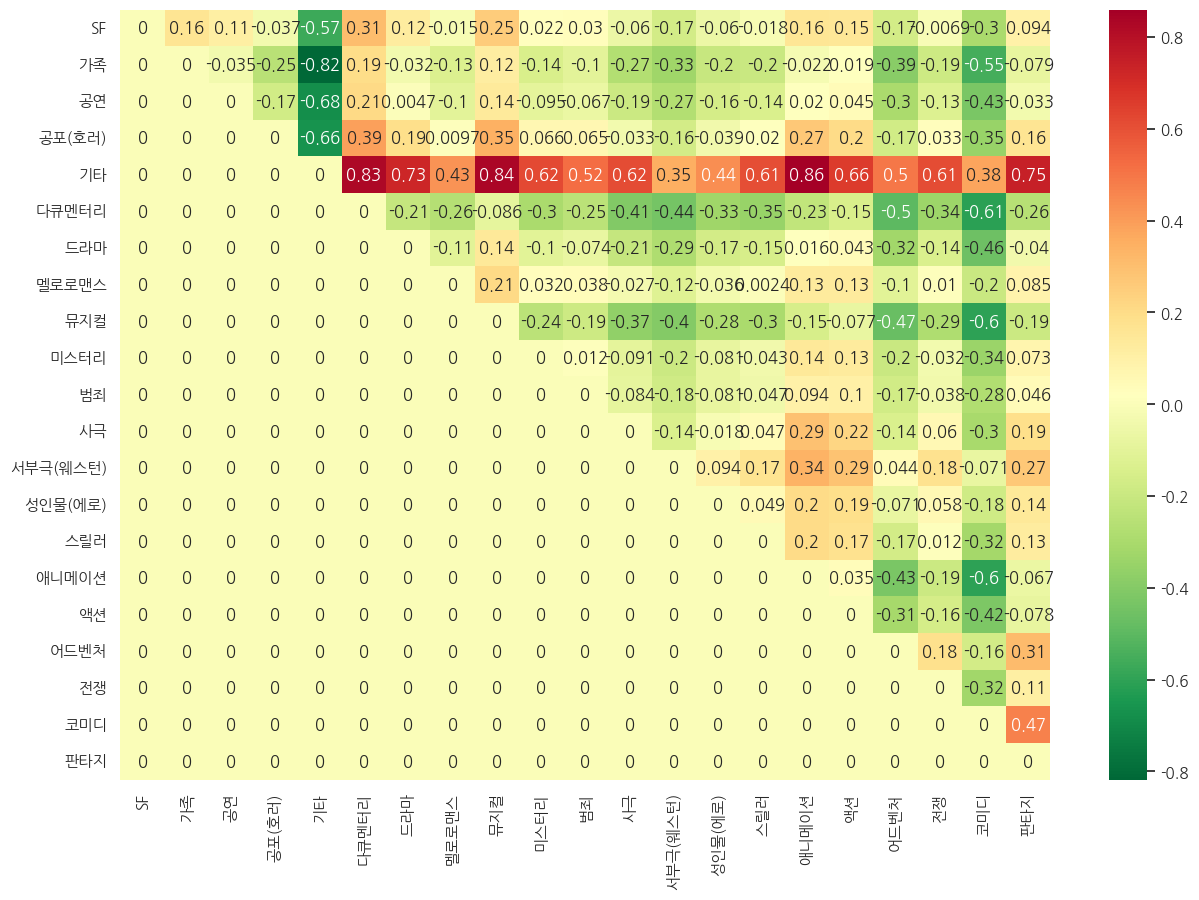

In [87]:
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt

np.random.seed(0)


sns.set(font='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 10))

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

기타 영화를 더 잘 잡아내는 모습을 보인다.
